In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
df = pd.read_csv("exoplanet_data.csv", comment = "#")

In [19]:
df.shape
#567 rows, 92 columns

(567, 92)

In [20]:
df.columns
#pl_eqtlim, st_teff, pl_orbsmax, pl_insollim, st_raderr

Index(['pl_name', 'hostname', 'default_flag', 'sy_snum', 'sy_pnum',
       'discoverymethod', 'disc_year', 'disc_facility', 'soltype',
       'pl_controv_flag', 'pl_refname', 'pl_orbper', 'pl_orbpererr1',
       'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1',
       'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1',
       'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2',
       'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2',
       'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2',
       'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1',
       'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol', 'pl_insolerr1',
       'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2',
       'pl_eqtlim', 'ttv_flag', 'st_refname', 'st_spectype', 'st_teff',
       'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1',
       'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2

In [24]:
#planet Name (pl_name): Planet name most commonly used in the literature. Probably just lists the name of the planet by its most common name (Jupiter, Saturn, Mars, etc.)
#Host Name (hostname): Stellar name most commonly used in the literature. Most common name of the star
#Discovery Method (discoverymethod): Method by which the planet was first identified. Description mostly speaks for itself
#Spectral Type (st_spectype): Classification of the star based on their spectral characteristics following the Morgan-Keenan system. Characterizes the star by its surface temperature and luminosity.
#Equilibrium Temperature [K] (pl_eqt): The equilibrium temperature of the planet as modeled by a black body heated only by its host star, or for directly imaged planets, the effective temperature of the planet required to match the measured luminosity if the planet were a black body. Theoretical energy radiated by an object (like a planet) that matches the energy given to it by a star (not counting internal energy)
#Planet Mass or Mass*sin(i) [Jupiter Mass] (pl_bmassj): Best planet mass estimate available, in order of preference: Mass, M*sin(i)/sin(i), or M*sin(i), depending on availability, and measured in Jupiter masses. Probably the mass of a planet with units in relation to Jupiter's mass

In [25]:
less_df = df[['pl_name','hostname','discoverymethod','st_spectype','pl_eqt','pl_bmassj']]

In [26]:
new_df = less_df.dropna(axis=1)

In [27]:
new_df.shape
#567 rows, 3 columns

(567, 3)

In [28]:
new_df.head()

,pl_name,hostname,discoverymethod
0,7 CMa c,7 CMa,Radial Velocity
1,7 CMa c,7 CMa,Radial Velocity
2,DMPP-1 b,DMPP-1,Radial Velocity
3,DMPP-1 c,DMPP-1,Radial Velocity
4,DMPP-1 d,DMPP-1,Radial Velocity


In [29]:
new_df.tail()

,pl_name,hostname,discoverymethod
562,bet Pic c,bet Pic,Radial Velocity
563,bet Pic c,bet Pic,Radial Velocity
564,bet Pic c,bet Pic,Radial Velocity
565,eps Ind A b,eps Ind A,Radial Velocity
566,eps Ind A b,eps Ind A,Radial Velocity


In [31]:
new_df.columns

Index(['pl_name', 'hostname', 'discoverymethod'], dtype='object')

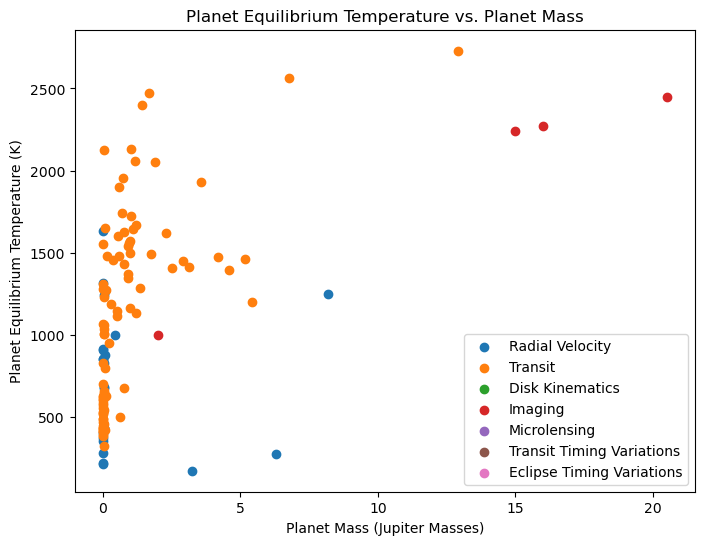

In [38]:
plt.figure(figsize=(8,6))
for method in df["discoverymethod"].unique():
    subset = df[df["discoverymethod"] == method]
    plt.scatter(subset["pl_bmassj"], subset["pl_eqt"], label=method)
plt.xlabel("Planet Mass (Jupiter Masses)")
plt.ylabel("Planet Equilibrium Temperature (K)")
plt.title("Planet Equilibrium Temperature vs. Planet Mass")
plt.legend()
plt.show()

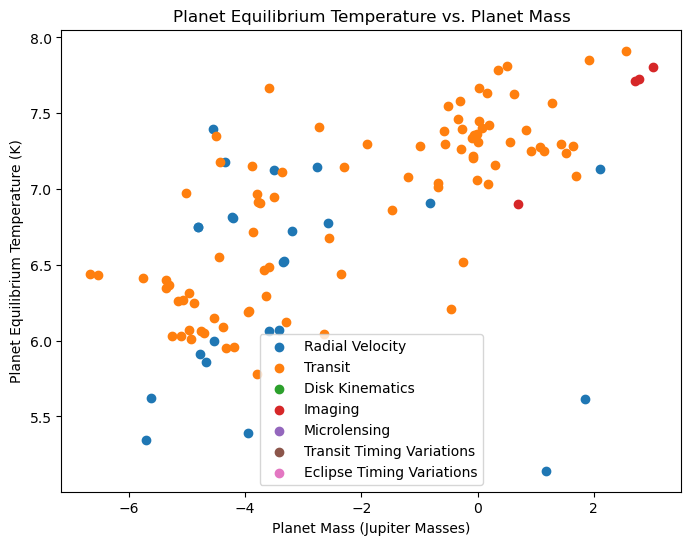

In [68]:
plt.figure(figsize=(8,6))
for method in df["discoverymethod"].unique():
    subset = df[df["discoverymethod"] == method]
    plt.scatter(np.log(subset["pl_bmassj"]), np.log(subset["pl_eqt"]), label=method)
plt.xlabel("Planet Mass (Jupiter Masses)")
plt.ylabel("Planet Equilibrium Temperature (K)")
plt.title("Planet Equilibrium Temperature vs. Planet Mass")
plt.legend()
plt.show()

In [69]:
#They are more likely to be small (smaller than Jupiter, at least)
coldest = df[less_df["pl_bmassj"] > 5].sort_values("pl_eqt").iloc[0]
print(coldest)

pl_name           eps Ind A b
hostname            eps Ind A
default_flag                1
sy_snum                     3
sy_pnum                     1
                     ...     
sy_gaiamagerr1       0.007374
sy_gaiamagerr2      -0.007374
rowupdate          2024-08-07
pl_pubdate            2024-09
releasedate        2024-08-07
Name: 566, Length: 92, dtype: object


In [63]:
coldest = less_df[less_df["pl_bmassj"] > 5].sort_values("pl_eqt").iloc[0]
print(coldest)
#Name: eps Ind A b
#index 566
#The equilibrium temperature is 275 K
#The mass is 6.31 Jupiter Masses
#The planet orbits an orange star that is not very similar to the star (lower luminosity, mass, and surface temp)

pl_name                eps Ind A b
hostname                 eps Ind A
discoverymethod    Radial Velocity
st_spectype                   K5 V
pl_eqt                       275.0
pl_bmassj                     6.31
Name: 566, dtype: object


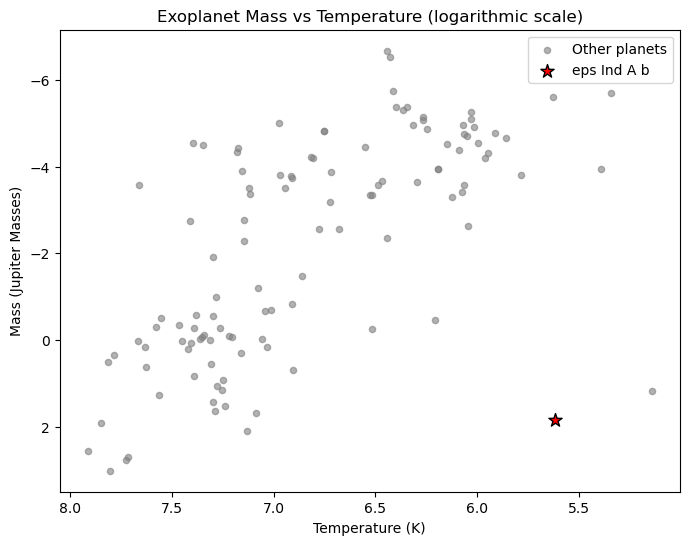

In [64]:
plt.figure(figsize=(8,6))
plt.scatter(np.log(df["pl_eqt"]), np.log(df["pl_bmassj"]),
            s=20, color="gray", alpha=0.6, label="Other planets")
coldest = df[df["pl_bmassj"] > 5].sort_values("pl_eqt").iloc[0]
plt.scatter(np.log(coldest["pl_eqt"]), np.log(coldest["pl_bmassj"]),
            s=100, color="red", marker="*", edgecolor="black",
            label=coldest["pl_name"])

plt.xlabel("Temperature (K)")
plt.ylabel("Mass (Jupiter Masses)")
plt.legend()
plt.title("Exoplanet Mass vs Temperature (logarithmic scale)")

plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

plt.show()

In [ ]:
#Title: A temperate super-Jupiter imaged with JWST in the mid-infrared
#Abstract: Proved the existence of a rumored giant planet using JWST coronagraphic images and discovered its properties. The planet has a temp of 275 K, is incredibly bright, and is the only planet in its system.
#Yes, it seems to match the exoplanet.
#The planet is special for as big as it was predicted to be, but with very unique orbital properties.
#The equilibrium temperatures and masses seem to match